In [ ]:
# napisać crossover i mutation (w NSGA2Utils) dla permutacji, ew. dopisać obliczanie hypervolume

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

problem = 'AB'

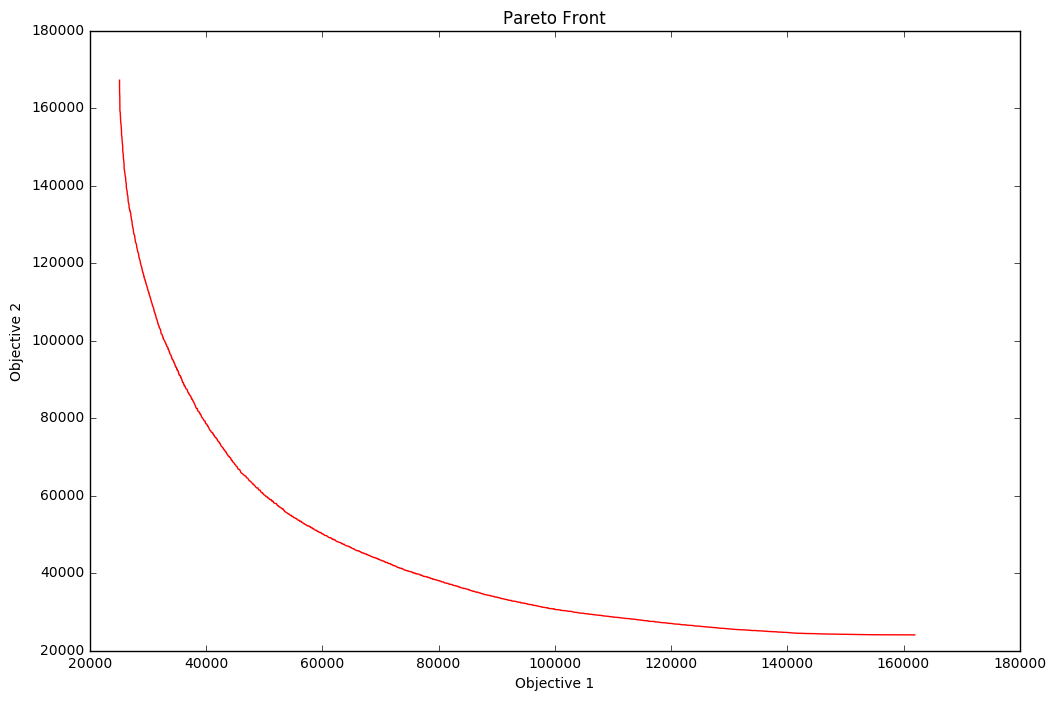

In [2]:
front = []

with open('data/best.euclid' + problem + '100.tsp') as f:
    for line in f:
        front.append(map(int, line.split()))
    
front = zip(*front)
        
plt.figure(figsize=(12, 8))
plt.plot(front[0], front[1], 'r-')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Pareto Front')
plt.show()

### Wyznaczanie frontu Pareto algorytmem NSGA-II

In [3]:
import sys

sys.path.append('../nsga2/')

from metrics.problems.motsp import MOTSPMetrics
from nsga2.evolution import Evolution
from nsga2.problems.motsp import MOTSP
from nsga2.problems.motsp.motsp_definitions import MOTSPDefinitions

def print_statistics(population, iteration):
    PF = population.fronts[0]
    metrics = MOTSPMetrics()
    print("Iteration %03d: HV = %0.2f, HVR = %0.2f" % (iteration, metrics.HV(PF), metrics.HVR(PF)))

statistics = []
def log_statistics(population, iteration):
    ranks = [individual.rank for individual in population]
    crowding_distances = [individual.crowding_distance for individual in population]
    objectives = [individual.objectives for individual in population]

    pareto_front = population.fronts[0]
    metrics = MOTSPMetrics()
    hv = metrics.HV(pareto_front)
    hvr = metrics.HVR(pareto_front)

    statistics.append((hv, hvr, ranks, crowding_distances, objectives))

In [4]:
def plot_PF(results):
    PF = np.array([i.objectives for i in results])

    plt.figure(figsize=(12, 8))
    plt.plot(PF[:, 0], PF[:, 1], 'ro')
    plt.xlabel('Objective 1')
    plt.ylabel('Objective 2')
    plt.title('Pareto Front')
    plt.show()

In [5]:
%%time

pop_size = 50

solver = Evolution(MOTSP(MOTSPDefinitions(problem)), 100, pop_size)
solver.register_on_new_generation(print_statistics)
solver.register_on_new_generation(log_statistics)

results = solver.evolve()

plot_PF(results)

IndexError: arrays used as indices must be of integer (or boolean) type

### Wykres HV i HVR

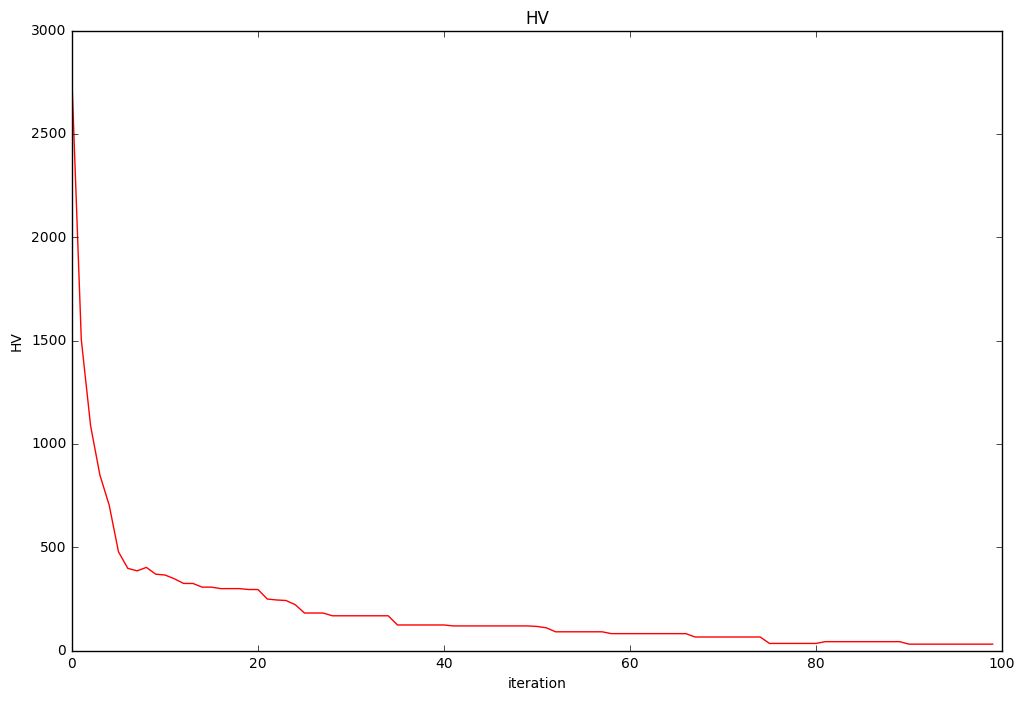

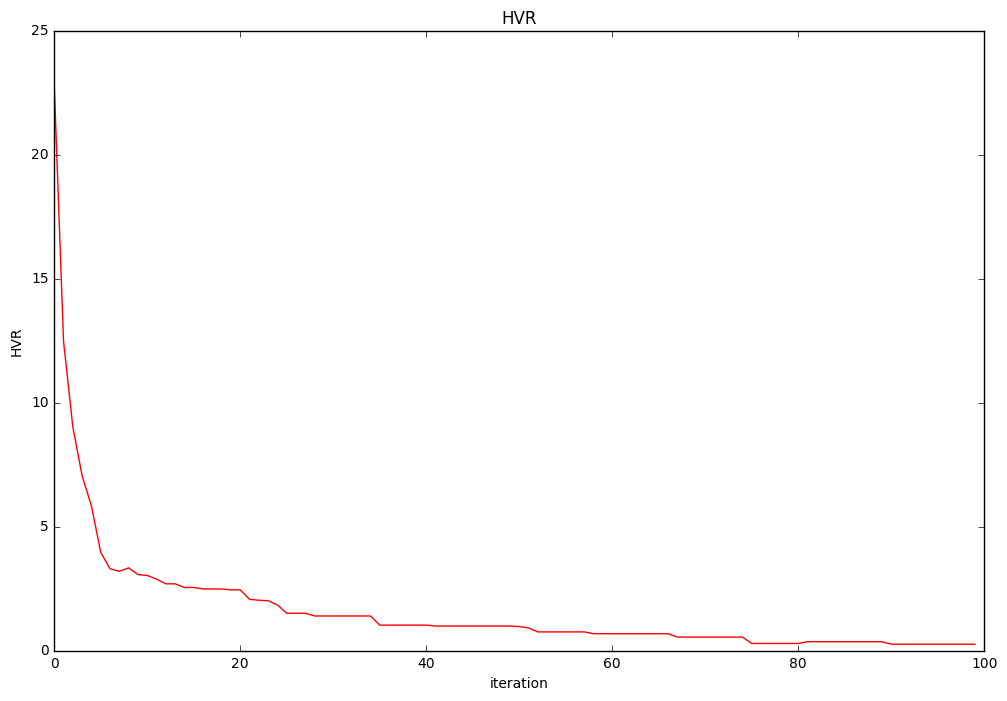

In [18]:
HV = np.array([statistics[i][0] for i in xrange(len(statistics))])
HVR = np.array([statistics[i][1] for i in xrange(len(statistics))])

plt.figure(figsize=(12, 8))
plt.plot(HV, 'r-')
plt.xlabel('iteration')
plt.ylabel('HV')
plt.title('HV')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(HVR, 'r-')
plt.xlabel('iteration')
plt.ylabel('HVR')
plt.title('HVR')
plt.show()

### Wykres przykładowej populacji (ze wskazanej iteracji)

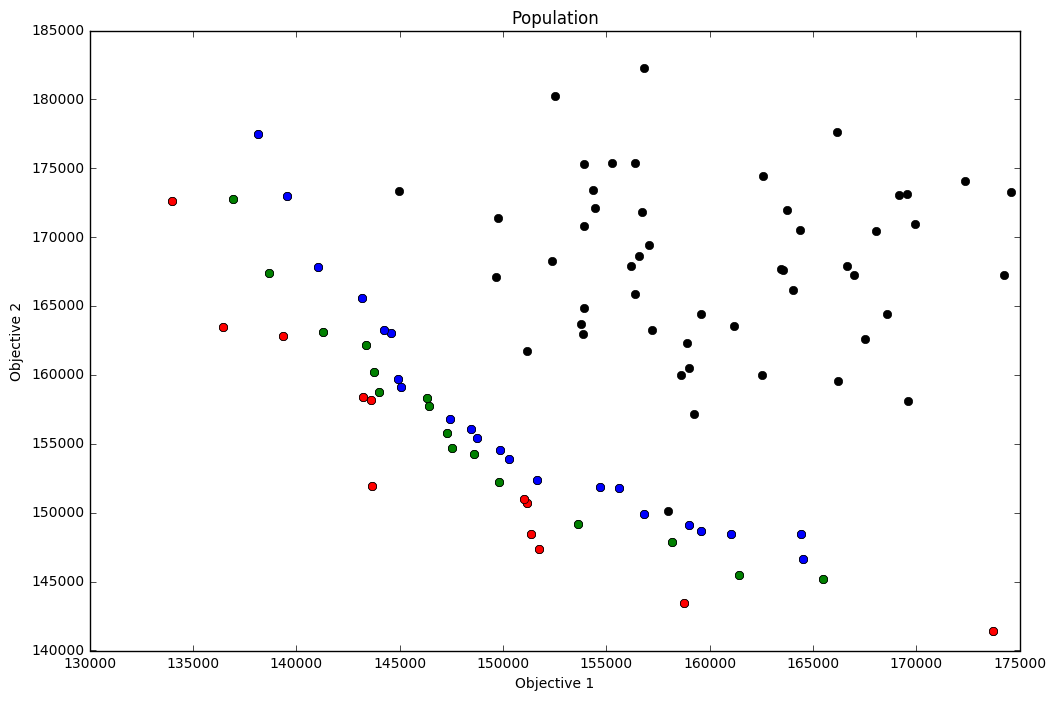

In [9]:
iteration = len(statistics)-1

ranks = np.array(statistics[iteration][2])
objectives = np.array(statistics[iteration][4])

PF0 = (ranks == 0)
PF1 = (ranks == 1)
PF2 = (ranks == 2)

plt.figure(figsize=(12, 8))
plt.plot(objectives[:, 0], objectives[:, 1], 'ko')
plt.plot(objectives[PF2, 0], objectives[PF2, 1], 'bo')
plt.plot(objectives[PF1, 0], objectives[PF1, 1], 'go')
plt.plot(objectives[PF0, 0], objectives[PF0, 1], 'ro')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Population')
plt.show()